Лабораторная работа №2. Вывод символов на экран дисплея.
1. Разработать программу на языке ассемблера, которая выводит на экран заданную строку S в обратном порядке.
2. Разработать программу на языке ассемблера, в которой заполнить память N  заданными символами, вывести их в виде матрицы по M символов в строке и K строк
3. В задании 2 вывести символы в виде треугольника. Например, для 21 символа "8": 8 88 888 8888 88888 888888
4. Разработать программу на языке ассемблера, в которой для заданного числа N найти сумму его цифр и вывести результат на экран.
5. Разработать программу аналогичную заданию 4 на языке программирования C. Провести сравнение размеров исполняемых файлов. Постараться сократить размер исполняемого файла на языке ассемблера и на языке С.


In [ ]:
import random as rd
import pandas as pd
import math

Variant = 23
rd.seed(Variant)
Str1 = 'qwertyuioplkjhgfdsazxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM'
N = rd.randint(20,40)
s1 = ''
for i in range(N):
    s1 += Str1[rd.randint(0, len(Str1)-1)]
D = '!@#$%&*+:;|'[rd.randint(0,10)]
N1 = rd.randint(3,30)
N2 = int(N1 * (N1 + 1) / 2)
if (int(N2/N1) - math.floor(N2/N1)) == 0:
    M = int(N2 / N1)
    K = int(N2 / M)
else:
    M = int(N2 / (N1 + 1))
    K = int(N2 / M)
N4 = rd.randint(123432, 5645634534)
Data  = pd.DataFrame({'Задание':[1,2,3,4,5],'Параметры':['S='+s1,[D, 'N='+str(N2), 
                    'M ='+str(M), 'K = '+str(K)],'-','N='+str(N4),'-']})
print(Data)

лаб1

   Задание                        Параметры
0        1  S=ywSzWnIvoXjsEqgFRwuyZYQwUGXWv
1        2           [!, N=45, M =5, K = 9]
2        3                                -
3        4                     N=3363522457
4        5                                -

In [ ]:
format ELF64
public _start

section '.data' writeable
    msg db 'ywSzWnIvoXjsEqgFRwuyZYQwUGXWv'
    msg_len = $ - msg 

section '.text' executable
_start:
    mov rsi, msg + msg_len - 1 ; Адрес последнего символа
    mov rbx, msg_len           ; Сколько букв нам надо напечатать

reverse_loop:
    push rbx                   ; Сохраняем счетчик 
    
    ; Печатаем 1 символ, на который указывает RSI
    mov eax, 1                 ; Системный вызов №1 
    mov edi, 1                 ; Куда: в стандартный вывод (экран)
    mov edx, 1                 ; Сколько байт: 1
    syscall

    pop rbx                    ; Возвращаем счетчик
    dec rsi                    ; Переходим к ПРЕДЫДУЩЕМУ символу
    dec rbx                    ; Уменьшаем общее количество оставшихся букв
    jnz reverse_loop           ; Если еще не 0, повторяем

    mov eax, 60                ; Выход
    xor edi, edi
    syscall

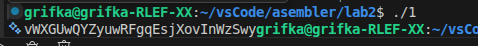

In [ ]:
format ELF64
public _start

section '.data' writeable
    char db '!'
    nl   db 10

section '.text' executable
_start:
    mov r8, 5          ; Счётчик строк (M)
outer_loop:
    mov r9, 9          ; Счётчик символов (K)
inner_loop:
    ; Сохраняем регистры, так как syscall может их изменить
    push r8 r9
    mov eax, 1         ; sys_write
    mov edi, 1         ; stdout
    mov rsi, char
    mov edx, 1
    syscall
    pop r9 r8

    dec r9
    jnz inner_loop     ; Пока не напечатаем 9 символов

    ; Печать переноса строки
    push r8
    mov eax, 1
    mov edi, 1
    mov rsi, nl
    mov edx, 1
    syscall
    pop r8

    dec r8
    jnz outer_loop     ; Пока не напечатаем 5 строк

    mov eax, 60        ; sys_exit
    xor edi, edi
    syscall

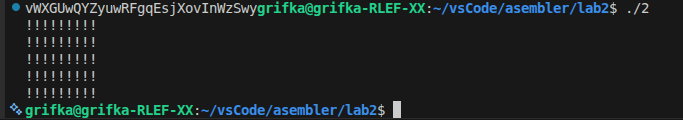

In [ ]:
format ELF64
public _start

section '.data' writeable
    char db '8'
    nl   db 10

section '.text' executable
_start:
    mov r8, 1          ; Текущее количество символов в строке
tri_loop:
    mov r9, r8         ; Внутренний счетчик равен номеру строки
line_loop:
    push r8 r9
    mov eax, 1
    mov edi, 1
    mov rsi, char
    mov edx, 1
    syscall
    pop r9 r8
    dec r9
    jnz line_loop

    push r8
    mov eax, 1
    mov rsi, nl
    mov edx, 1
    syscall
    pop r8

    inc r8
    cmp r8, 7          ; Повторяем, пока не дойдем до 7-й строки
    jne tri_loop

    mov eax, 60
    xor edi, edi
    syscall

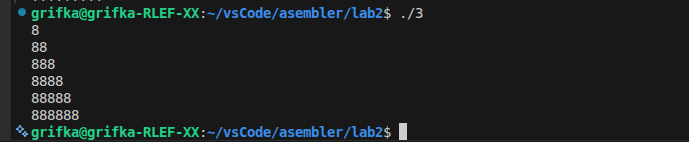

In [ ]:
format ELF64
public _start

section '.data' writeable
    num      dq 3363522457
    newline  db 10
    buffer   db 10 dup(0)    ; Буфер, куда запишем цифры для печати

section '.text' executable
_start:
    ; --- Часть 1: Считаем сумму цифр ---
    mov rax, [num]
    xor rbx, rbx            ; Здесь будет итоговая сумма

calc_sum:
    xor rdx, rdx
    mov rcx, 10
    div rcx                 ; RAX = RAX / 10, RDX = остаток (цифра)
    add rbx, rdx
    test rax, rax
    jnz calc_sum            ; Повторяем, пока число не кончится

    ;Перевод суммы в строку ---
    mov rax, rbx            ; Кладем сумму в RAX для деления
    lea rdi, [buffer + 9]   ; Начинаем заполнять буфер с конца

convert_loop:
    xor rdx, rdx
    mov rcx, 10
    div rcx                 ; Делим сумму на 10
    add dl, '0'             ; Превращаем цифру в символ (например, 4 -> '4')
    mov [rdi], dl           ; Пишем символ в буфер
    dec rdi                 ; Сдвигаемся влево
    test rax, rax
    jnz convert_loop        ; Пока сумма не кончилась

    ; После цикла RDI указывает на место ПЕРЕД первым символом.
    ; Нам нужно сдвинуть его вперед на 1, чтобы он указывал точно на начало строки.
    inc rdi

    ; Вывод
    mov rsi, rdi            ; Адрес начала строки в буфере
    mov rdx, buffer + 10    ; Конец буфера
    sub rdx, rsi            ; Вычисляем длину строки (конец - начало)
    
    mov eax, 1              ; sys_write
    mov edi, 1              ; stdout
    syscall

    ; Печатаем перенос строки (красиво же должно быть)
    mov eax, 1
    mov edi, 1
    mov rsi, newline
    mov edx, 1
    syscall

    ; --- Выход ---
    mov eax, 60
    xor edi, edi
    syscall

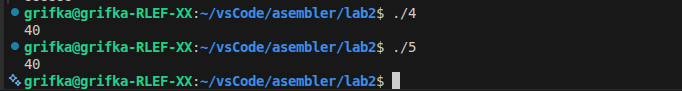

In [ ]:
#include <stdio.h>

int main() {
    unsigned long n = 3363522457;
    int sum = 0;
    while(n > 0) {
        sum += n % 10;
        n /= 10;
    }
    printf("%d\n", sum);
    return 0;
}

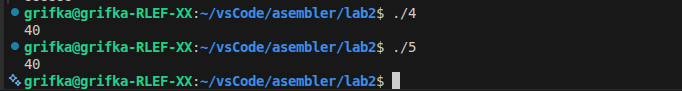